In [2]:
import pandas as pd

df = pd.read_csv('it_category_jobs.csv')


In [7]:
df.head(3).T

,0,1,2
RowNumber,123,180,314
Jobpost_RawTitle,کارشناس دیجیتال مارکتینگ و تولید محتوا,کارشناس دیجیتال مارکتینگ - خانم,طراح رابط و تجربه کاربری (UI/UX)
Jobpost_PreferredGender,تفاوتی ندارد,فقط خانم,تفاوتی ندارد
Jobpost_ProvinceFa,تهران,خراسان رضوی,البرز
Jobpost_ProvinceEn,Tehran,Khorasan Razavi,Alborz
Jobpost_WorkTypeFa,تمام وقت,تمام وقت,تمام وقت
Jobpost_WorkTypeEn,Full Time,Full Time,Full Time
Jobpost_SalaryCanBeShown,True,True,True
Jobpost_MinSalary,12.0,5.0,10.0
Jobpost_MaxSalary,15.0,6.0,12.0


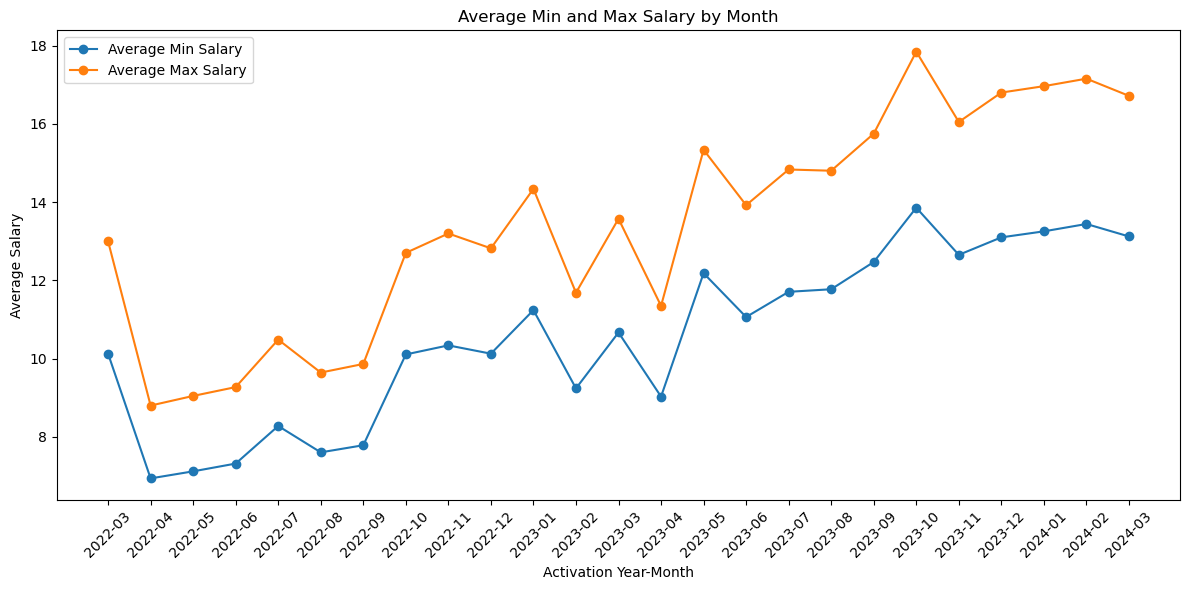

In [3]:
import matplotlib.pyplot as plt

# Group by 'Jobpost_ActivationTime_YEAR_MONTH' and calculate mean salaries
monthly_avg = df.groupby('Jobpost_ActivationTime_YEAR_MONTH')[['Jobpost_MinSalary', 'Jobpost_MaxSalary']].mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg['Jobpost_MinSalary'], marker='o', label='Average Min Salary')
plt.plot(monthly_avg.index, monthly_avg['Jobpost_MaxSalary'], marker='o', label='Average Max Salary')
plt.xlabel('Activation Year-Month')
plt.ylabel('Average Salary')
plt.title('Average Min and Max Salary by Month')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


17:24:41 - cmdstanpy - INFO - Chain [1] start processing
17:24:42 - cmdstanpy - INFO - Chain [1] done processing


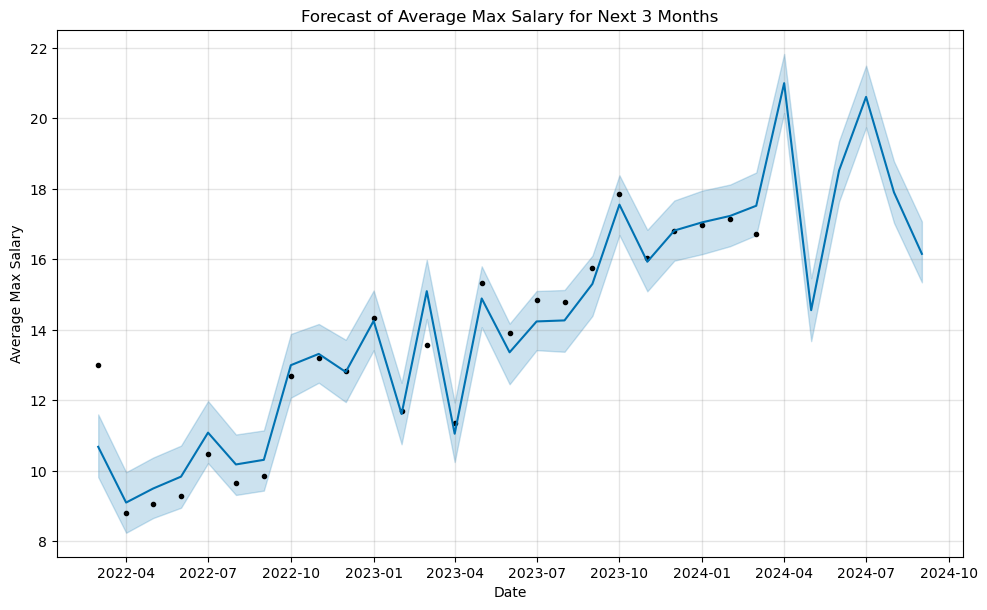

Forecast for next 3 months:
           ds       yhat  yhat_lower  yhat_upper
28 2024-07-01  20.607759   19.742058   21.494360
29 2024-08-01  17.899695   17.033165   18.778335
30 2024-09-01  16.153340   15.345113   17.073765


In [4]:
# Forecast Jobpost_MaxSalary for next 3 months by using prophet

from prophet import Prophet
import pandas as pd

# Prepare the data for Prophet
# Prophet expects columns: ds (date), y (value to forecast)
salary_df = df.groupby('Jobpost_ActivationTime_YEAR_MONTH')['Jobpost_MaxSalary'].mean().reset_index()
salary_df = salary_df.rename(columns={'Jobpost_ActivationTime_YEAR_MONTH': 'ds', 'Jobpost_MaxSalary': 'y'})

# If ds is not datetime, convert it
salary_df['ds'] = pd.to_datetime(salary_df['ds'])

# Fit Prophet model
model = Prophet()
model.fit(salary_df)

# Make future dataframe for next 3 months
future = model.make_future_dataframe(periods=6, freq='MS')  # 'MS' = Month Start

# Forecast
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Forecast of Average Max Salary for Next 3 Months')
plt.xlabel('Date')
plt.ylabel('Average Max Salary')
plt.show()

# Show forecasted values for next 3 months
future_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)
print("Forecast for next 3 months:")
print(future_forecast)


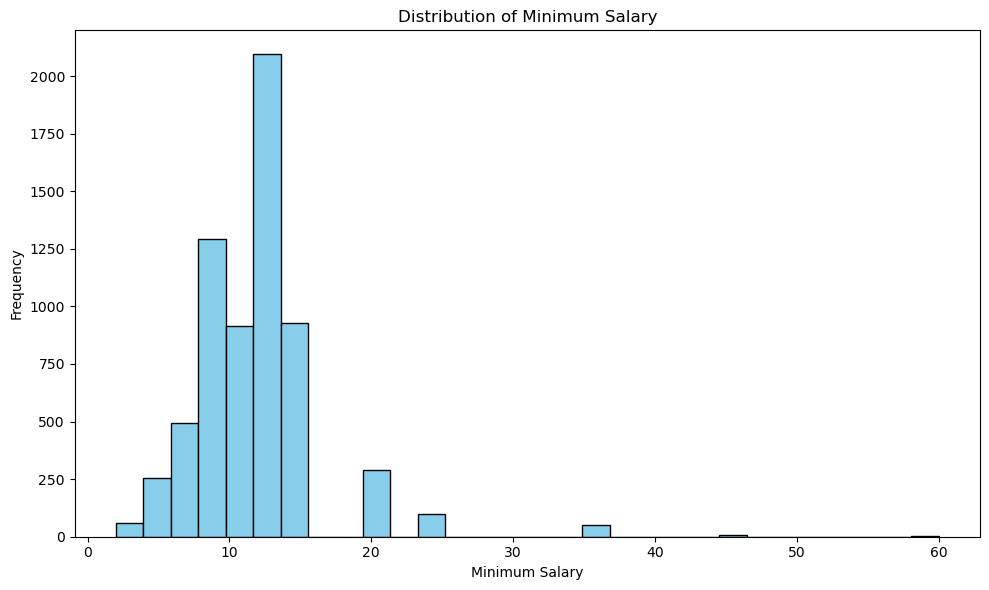

In [5]:
plt.figure(figsize=(10,6))
plt.hist(df['Jobpost_MinSalary'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Minimum Salary')
plt.xlabel('Minimum Salary')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


/tmp/ipykernel_6329/3966683250.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=top_cities, showfliers=True)


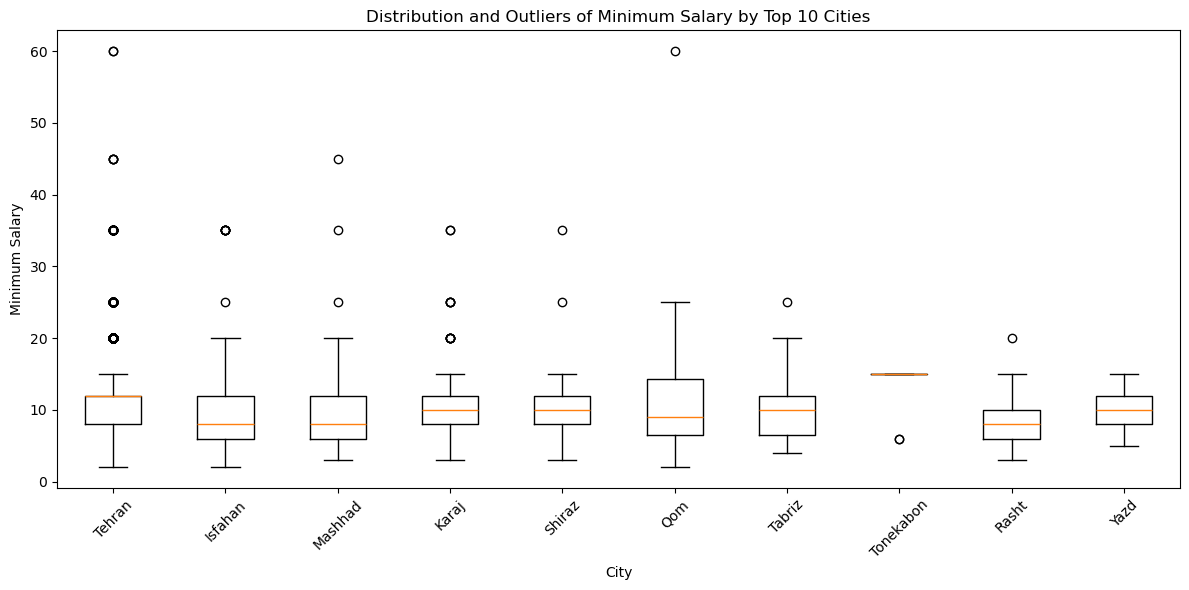

In [8]:
import matplotlib.pyplot as plt

# Find top 10 cities by job count
top_cities = df['Company_CityEn'].value_counts().head(10).index

# Filter dataframe for top 10 cities
df_top_cities = df[df['Company_CityEn'].isin(top_cities)]

# Prepare data for boxplot: list of min salaries for each city
data = [df_top_cities[df_top_cities['Company_CityEn'] == city]['Jobpost_MinSalary'].dropna() for city in top_cities]

plt.figure(figsize=(12, 6))
plt.boxplot(data, labels=top_cities, showfliers=True)
plt.title("Distribution and Outliers of Minimum Salary by Top 10 Cities")
plt.xlabel("City")
plt.ylabel("Minimum Salary")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
